# Download the loan dataset

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("devzohaib/eligibility-prediction-for-loan")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/eligibility-prediction-for-loan


Import LIbraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data preprocessing
in this section the data will be cleaned, encoded, and preprocessed

In [3]:
df = pd.read_csv("/kaggle/input/eligibility-prediction-for-loan/Loan_Data.csv")

In [4]:
df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


it seems there are columns with missing values. Let's check how many missing values are there!

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [9]:
gender_impact = df.groupby("Gender")["Loan_Status"].value_counts(normalize=True).unstack()
print(gender_impact)

Loan_Status         N         Y
Gender                         
Female       0.330357  0.669643
Male         0.306748  0.693252


In [10]:
married_impact = df.groupby("Married")["Loan_Status"].value_counts(normalize=True).unstack()
print(married_impact)

Loan_Status         N         Y
Married                        
No           0.370892  0.629108
Yes          0.283920  0.716080


In [11]:
edu_impact = df.groupby("Education")["Loan_Status"].value_counts(normalize=True).unstack()
print(edu_impact)

Loan_Status          N         Y
Education                       
Graduate      0.291667  0.708333
Not Graduate  0.388060  0.611940


Since the approval rates for both genders are nearly the same, we won't need the Gender column

We also won't need loan_id column for the prediction, so it can be removed.

In [12]:
df.drop(columns=["Loan_ID", "Gender"], inplace=True)
df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Now we need to encode columns with categorical data

In [13]:
binary_mappings = {
    "Married": {"Yes": 1, "No": 0},
    "Education": {"Graduate": 1, "Not Graduate": 0},
    "Self_Employed": {"Yes": 1, "No": 0},
    "Loan_Status": {"Y": 1, "N": 0}
}

for col, mapping in binary_mappings.items():
    df[col] = df[col].map(mapping)
    
df = pd.get_dummies(df, columns=["Property_Area"], drop_first=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Married                  611 non-null    float64
 1   Dependents               599 non-null    object 
 2   Education                614 non-null    int64  
 3   Self_Employed            582 non-null    float64
 4   ApplicantIncome          614 non-null    int64  
 5   CoapplicantIncome        614 non-null    float64
 6   LoanAmount               592 non-null    float64
 7   Loan_Amount_Term         600 non-null    float64
 8   Credit_History           564 non-null    float64
 9   Loan_Status              614 non-null    int64  
 10  Property_Area_Semiurban  614 non-null    bool   
 11  Property_Area_Urban      614 non-null    bool   
dtypes: bool(2), float64(6), int64(3), object(1)
memory usage: 49.3+ KB


For crucial columns, such as loan amount and credit history, the row with missing values must be taken with care. We can use median to fill the missing loan amount and use "most_frequent" to fill the missing values in categorical columns and "Dependents" column

In [15]:
from sklearn.impute import SimpleImputer

# Fill numerical missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
num_cols = ["LoanAmount", "Loan_Amount_Term"]
df[num_cols] = imputer.fit_transform(df[num_cols])

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
cat_cols = ["Dependents", "Self_Employed", "Married", "Credit_History"]
df[cat_cols] = imputer.fit_transform(df[cat_cols])

# change types to int
df["Dependents"] = df["Dependents"].replace({"3+": 3}).astype(int)
df["Property_Area_Semiurban"] = df["Property_Area_Semiurban"].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Married                  614 non-null    object 
 1   Dependents               614 non-null    int64  
 2   Education                614 non-null    int64  
 3   Self_Employed            614 non-null    object 
 4   ApplicantIncome          614 non-null    int64  
 5   CoapplicantIncome        614 non-null    float64
 6   LoanAmount               614 non-null    float64
 7   Loan_Amount_Term         614 non-null    float64
 8   Credit_History           614 non-null    object 
 9   Loan_Status              614 non-null    int64  
 10  Property_Area_Semiurban  614 non-null    int64  
 11  Property_Area_Urban      614 non-null    bool   
dtypes: bool(1), float64(3), int64(5), object(3)
memory usage: 53.5+ KB


In [16]:
df.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
0,0.0,0,1,0.0,5849,0.0,128.0,360.0,1.0,1,0,True
1,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0,False
2,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,1,0,True
3,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,0,True
4,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,1,0,True


In [17]:
corr = df.corr().round(3)
corr["Loan_Status"]

Married                    0.091
Dependents                 0.010
Education                  0.086
Self_Employed             -0.004
ApplicantIncome           -0.005
CoapplicantIncome         -0.059
LoanAmount                -0.033
Loan_Amount_Term          -0.023
Credit_History             0.541
Loan_Status                1.000
Property_Area_Semiurban    0.137
Property_Area_Urban       -0.044
Name: Loan_Status, dtype: float64

We can see some of the columns have zero, even negative correlation to the loan status. We can remove these columns

In [18]:
cols_to_drop = ["ApplicantIncome", "CoapplicantIncome", 
                "LoanAmount", "Loan_Amount_Term", "Property_Area_Urban", "Self_Employed"]

df.drop(columns=cols_to_drop, inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Married                  614 non-null    object
 1   Dependents               614 non-null    int64 
 2   Education                614 non-null    int64 
 3   Credit_History           614 non-null    object
 4   Loan_Status              614 non-null    int64 
 5   Property_Area_Semiurban  614 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 28.9+ KB


Let's check the distribution of the labels

In [20]:
df["Loan_Status"].value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

it seems like we need to do oversampling for the minority class to fix class imbalance. We will use random oversampling instead of SMOTE to prevent introducing synthetic bias to the model (especially for loan problems). Before oversampling the minority class, we need to split extract independent variables and dependent variable from the dataframe

In [21]:
X = df[["Married", "Dependents", "Education", "Credit_History", "Property_Area_Semiurban"]]
y = df["Loan_Status"]

In [22]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy="auto")
X_resampled, y_resampled = oversample.fit_resample(X, y)

y_resampled.value_counts()

Loan_Status
1    422
0    422
Name: count, dtype: int64

Let's apply standard scaler for the features

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

In [24]:
X_scaled

array([[-1.32596   , -0.74688369,  0.55179908,  0.53167168, -0.71781636],
       [ 0.75417056,  0.2473905 ,  0.55179908,  0.53167168, -0.71781636],
       [ 0.75417056, -0.74688369,  0.55179908,  0.53167168, -0.71781636],
       ...,
       [ 0.75417056,  0.2473905 ,  0.55179908, -1.88086002,  1.39311398],
       [ 0.75417056,  0.2473905 ,  0.55179908,  0.53167168, -0.71781636],
       [ 0.75417056,  0.2473905 ,  0.55179908,  0.53167168, -0.71781636]])

After we resampled and scaled the data, we need to split the data for training and test, using the good ol' 80/20 split

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=0)

In [26]:
X_train

array([[ 0.75417056, -0.74688369,  0.55179908,  0.53167168, -0.71781636],
       [-1.32596   , -0.74688369,  0.55179908,  0.53167168,  1.39311398],
       [ 0.75417056, -0.74688369,  0.55179908,  0.53167168, -0.71781636],
       ...,
       [-1.32596   ,  0.2473905 , -1.81225383,  0.53167168,  1.39311398],
       [ 0.75417056, -0.74688369,  0.55179908,  0.53167168,  1.39311398],
       [-1.32596   , -0.74688369,  0.55179908,  0.53167168, -0.71781636]])

In [27]:
y_train

780    0
193    1
2      1
839    0
798    0
      ..
835    0
192    0
629    0
559    1
684    0
Name: Loan_Status, Length: 675, dtype: int64

# Predictive Modeling
Now for the model, we will use logistic regression first then we will use more advanced model like xgboost and random forest.

## Logistic Regression Approach

In [28]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

Now let's try predicting the X_test and save it to a variable named y_pred

In [29]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1])

Now we assess the performance of this model by using confusion matrix and accuracy score

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cm

array([[36, 50],
       [ 3, 80]])

In [31]:
accuracy_score(y_test, y_pred)

0.6863905325443787

Let's visualize the confusion matrix

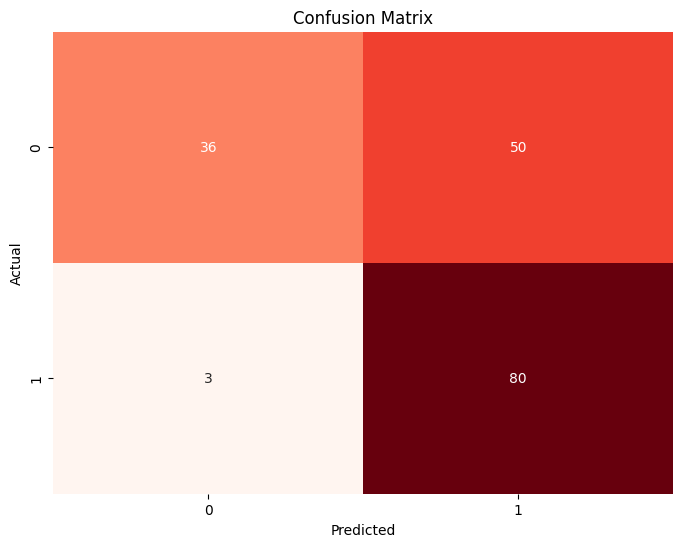

In [32]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The accuracy is quite bad for our data to use logistic regression, let's try with another model, more advanced one

## Random Forest Approach

## XGBoost Approach